### Documentation: https://numpy.org/doc/stable/reference/index.html , https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html, https://docs.python.org/3/library/random.html

#### Instructions: This code generates diffusive trajectories that represent a folding of a protein.
#### Problema atual: Dependência da variável NG 

In [1]:
import numpy as np
import random

In [2]:
## Loading the input data ##

vl = np.genfromtxt('dados.txt')#, dtype= None, delimiter= None)

#print(vl, type(vl))

In [3]:
## Defining the variables and supplying them with data ##

X = vl[0]

DIFFX = vl[1]

STEPS = vl[2]

dt = vl[3]

basin1 = vl[4] 
basin2 = vl[5]

HEIGHT = vl[6]

NG = vl[7]

#print(X, DIFFX, STEPS, dt, basin1, basin2, HEIGHT, NG)

In [4]:
## 

M=(basin2+basin1)/2
D=(basin2-basin1)/2

bounds = 100
grids = 100000
width = bounds*1.000000/grids

#print(M, D, width)

In [5]:
## Checking the values of the loaded data ##

for l in vl:
    print(l)

30.0
2.0
100000000.0
0.01
20.0
40.0
5.0
3.0
30.0
2.0
-3.0
35.0
2.0
-5.0
25.0
1.0
-3.0


In [6]:
### 

Max = np.array([0,0,0])
sigma = np.array([0,0,0])
GH = np.array([0,0,0])

for i in range(int(NG)):
    j = i*3
    Max[i] = vl[8+j] # The array takes the value of the reference plus three times ahead
    sigma[i] = vl[9+j]
    GH[i] = vl[10+j]
    
# print(Max)
# print(sigma)
# print(GH)  

In [7]:
###

def grad24(M, D, HEIGHT, X):
    eq1 = (-2*HEIGHT*2*(X-M)/D**2 +4*HEIGHT*(X-M)**3/D**4)
    return eq1

def E24(M, D, HEIGHT, X):
    eq2 = (-HEIGHT*2*(X-M)**2/D**2 +HEIGHT*(X-M)**4/D**4)
    return eq2
    
def gradG(Max, sigma, HEIGHT, X):
    #Sg = [l**2 for l in sigma]
    eq3 = HEIGHT*np.exp(-(X-Max)**2/sigma**2)*2*(Max-X)/sigma**2 
    return eq3
    
def EG(Max, sigma, HEIGHT, X):
    #Sg = [l**2 for l in sigma]
    eq4 = HEIGHT*np.exp(-(X-Max)**2/sigma**2)
    return eq4


#print(grad24(M, D, HEIGHT, X), E24(M, D, HEIGHT, X), gradG(Max, sigma, HEIGHT, X), EG(Max, sigma, HEIGHT, X))

In [8]:
###

def gaussian (DIFFX, dt):
    # sd is the rms value of the distribution.
    sd = 2*DIFFX*dt
    sd = np.sqrt(sd)
    RR = 0 
    while True:
        M1 = random.random()
        M2 = random.random()
        M1 = 2*(M1-0.5)
        M2 = 2*(M2-0.5)
        tmp1 = M1*M1 + M2*M2
        if tmp1 <= 1.0 and tmp1 >= 0.0:
            tmp2 = sd*np.sqrt( -2*np.log(tmp1)/tmp1 )
            RR = M1*tmp2
        if RR:
            break
    return RR

#print(gaussian(DIFFX, dt))

In [9]:
### Surface calculation ###

FF=[]
ES =[]
Hm = []

for i in range(grids):
    H = i*width
    FX = 0
    EE = 0
    grad1 = grad24(M, D, HEIGHT, H)
    FX += grad1
    
    grad2 = E24(M,D,HEIGHT,H)
    EE += grad2
    
    for l in range(int(NG)):
        grad3 = gradG(Max[l], sigma[l], GH[l], H)
#         print(grad3)
        FX += grad3
        
        grad4 = EG(Max[l], sigma[l], GH[l], H)
        EE += grad4
        
    FF.append(FX)
    ES.append(EE)
    Hm.append(H)
    
FF = np.asarray(FF)
EE = np.asarray(ES)
X = np.asarray(Hm)


np.savetxt('SURFACE_X', X, fmt="%10.6f")
np.savetxt('SURFACE_EE', EE, fmt="%10.6f")
np.savetxt('SURFACE_FX', FF, fmt="%10.6f")

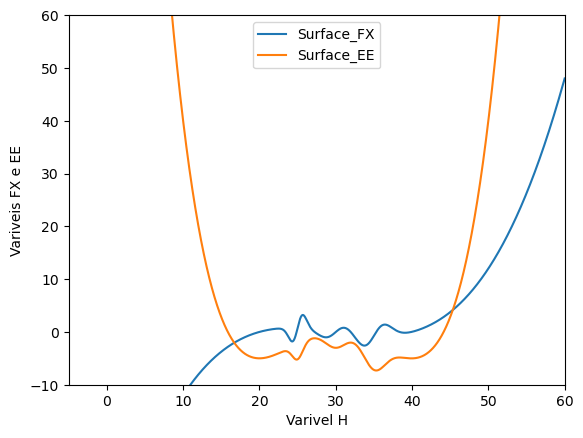

In [10]:
### Surface ###

import matplotlib.pyplot as plt
x = X 
fig, ax = plt.subplots()
ax.plot(x, FF, label = 'Surface_FX') 
ax.plot(x, EE, label = 'Surface_EE')
plt.xlabel('Varivel H')
plt.ylabel('Variveis FX e EE')
plt.xlim([None, 60])
plt.ylim([-10, 60])
plt.legend()
plt.show()

In [11]:
### Trajectory calculation ###
G = []
X = []

for i in range(int(STEPS)):
    
    J = int(H/width)
#    print(J)
    FX =FF[J] 
#    print(FX)
    H += -DIFFX*dt*FX+gaussian(DIFFX,dt)
#    print(Gaussis)
    
    if i % 100==0:  ## spride ## every 100 values
        T = dt *i
        G.append(H)
        X.append(T)
    
X = np.asarray(X)
G = np.asarray(G)

np.savetxt('TRAJECTORY_Y', G, fmt="%5.2f" )
np.savetxt('TRAJECTORY_X', X, fmt="%5.2f" )

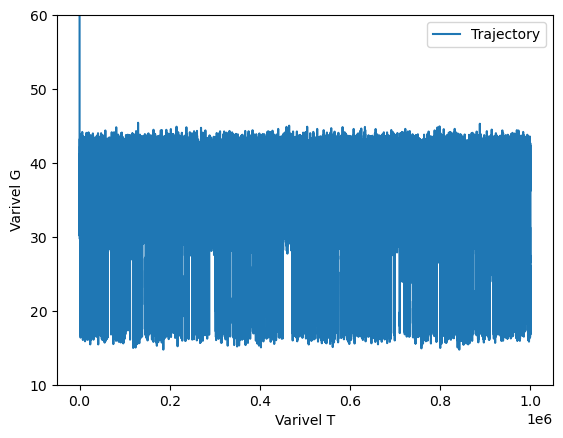

In [12]:
### Trajectory ###

x = X 
fig, ax = plt.subplots()
ax.plot(x, G, label = 'Trajectory')
plt.xlabel('Varivel T')
plt.ylabel('Varivel G')
#plt.xlim([None, 60])
plt.ylim([10, 60])
plt.legend()
plt.show()

#### Below are the attempts made regarding the above code.

In [13]:
#vl = np.loadtxt('dados.txt')

In [14]:
## SUPERFICIE ##

#FF = []
#Ee = []
#HM = []

#while (I<grids):
    #I += 1
    #H = I*width
    #FX = 0
    #EE = 0
    #grad1 = grad24(M, D, HEIGHT, X)
    #FX += grad1
    
    #grad2 = E24(M,D,HEIGHT,X)
    #EE += grad2
    
    #for l in range(int(NG)):
        #grad3 = gradG(Max[l], sigma[l], GH[l], X)
        #FX += grad3
        
        #grad4 = EG(Max[l], sigma[l], GH[l], X)
        #EE += grad4
    #FF.append(FX)
    #Ee.append(EE)
    #HM.append(H)
    
    


In [ ]:
#### TESTES ####

# Definido o vetores max sigma e gh

#Max = []
#sigma = [0,0,0]
# # sigma = np.zeros(int(NG))
# # GH = np.zeros(int(NG))

#Max.append(vl[8])
#Max.append(vl[11])
#Max.append(vl[14])

#for l in range(int(NG)):
    #sigma[l] = vl[9]

#Max = [0,0,0]
#Max= vl[8], vl[11], vl[14]
#sigma = [0,0,0]
#sigma = vl[9], vl[12], vl[15]
#GH = [0,0,0]
#GH = vl[10], vl[13], vl[16]

#Max = np.array([0,0,0])
#sigma = np.array([0,0,0])
#GH = np.array([0,0,0])

#for i in range(int(NG)):
    #Max[i] = vl[8+i] 
    #sigma[i] = vl[11+i]
    #GH[i] = vl[14+i]

#print(Max,sigma, type(Max))

### Exemplo de until ###

#while True:
    #do_something()
    #if condition():
    #break